In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sunse\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


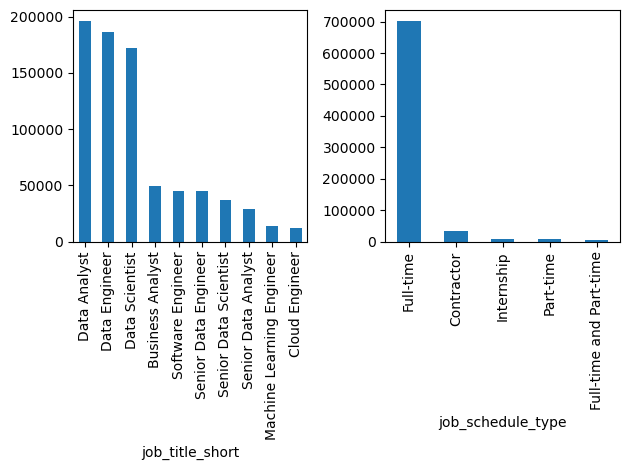

In [13]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(5).plot(kind='bar',ax=ax[1])
fig.tight_layout()

In [14]:
df_exploded = df.explode('job_skills')

In [15]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [16]:
df_skills_count = skills_count.reset_index(name='skill_count')

In [19]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [20]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
45,Business Analyst,digitalocean,1
2241,Software Engineer,visualbasic,1
29,Business Analyst,codecommit,1
24,Business Analyst,chainer,1


In [37]:
job_titles = ['Data Scientist','Data Engineer','Data Analyst']

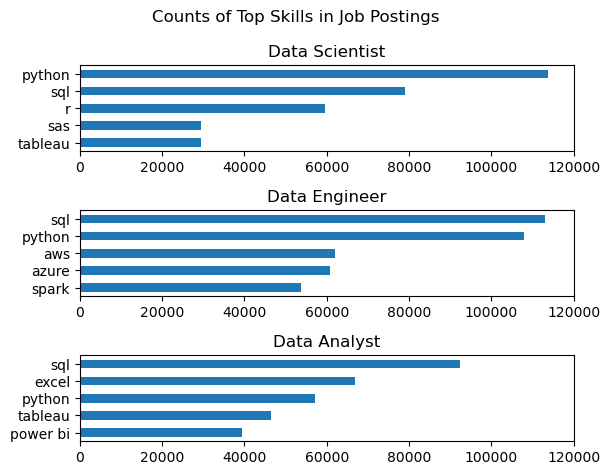

In [38]:
fig, ax = plt.subplots(3, 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head()
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i], title=job_title)
    fig.tight_layout()
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,120000)
    ax[i].legend().set_visible(False)
    fig.suptitle('Counts of Top Skills in Job Postings', fontsize=12)